In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 경고 메시지가 뜨지 않게 설정
import warnings 
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 검정
from scipy import stats

# 인코딩
from sklearn.preprocessing import LabelEncoder

In [10]:
df = pd.read_parquet('2018_신용정보.parquet')

In [11]:
target = pd.read_parquet('2018_회원정보.parquet', columns = ['Segment'])

In [8]:
target = target.reset_index(drop = True)

In [12]:
check = pd.read_csv('병합_selected_features.csv')

In [13]:
df[list(check.columns)]

KeyError: "['Segment', '이용금액_오프라인_R3M', '이용금액대_ord', '정상청구원금_B2M', '이용금액_R3M_신용체크', '연속유실적개월수_기본_24M_카드', '미이용_CA', '정상청구원금_B0M', '최대이용금액_체크_R12M', '최대이용금액_CA_R12M', '미이용_할부', '이용건수_신용_R12M', '이용금액_오프라인_B0M', '입회일자_신용', '이용금액_체크_R12M', '이용금액_체크_R3M', '최대이용금액_일시불_R12M', '이용금액_체크_R6M', '입회경과개월수_신용', '이용금액_일시불_R12M', '이용건수_CA_R12M', '이용개월수_신용_R12M', '이용건수_오프라인_R6M', '평잔_카드론_3M', '경과일수_CA', '이용개월수_신용_R6M', '이용금액_CA_R6M', '평잔_일시불_6M', '최대이용금액_할부_무이자_R12M', '변동률_RVCA평잔', '증감율_이용금액_일시불_분기', '이용건수_일시불_B0M', '이용금액_CA_R12M', '할부금액_6M_R12M', '이용개월수_CA_R3M', '이용개월수_체크_R12M', '이용금액_오프라인_R6M', '평잔_카드론_6M', '이용건수_신판_B0M', '최대이용금액_할부_R12M', 'OS구분_Android', '연체입금원금_B2M', '이용개월수_CA_R12M', '연체입금원금_B0M', '이용금액_할부_무이자_R12M', '이용개월수_CA_R6M', '소지카드수_유효_신용', '수신거부여부_메일', '이용금액_할부_R12M', '소지카드수_이용가능_신용', '_2순위업종_이용금액', '이용메뉴건수_ARS_B0M', '이용후경과월_신판', '증감율_이용금액_신판_분기', '이용건수_신판_R12M', '_1순위카드이용건수', '이용가맹점수', '이용개월수_일시불_R12M', '이용금액_체크_B0M', '할인금액_청구서_R3M', '이용건수_선결제_R6M', '연체입금원금_B5M', '이용후경과월_신용', '경과일수_카드론', '유효카드수_신용체크', '이용건수_오프라인_R3M', '이용건수_일시불_R3M', '연속무실적개월수_기본_24M_카드', '이용건수_일시불_R6M', '정상청구원금_B5M', '이용개월수_체크_R6M', '증감율_이용금액_신용_분기', '이용개월수_체크_R3M', '미이용_일시불', '상담건수_B0M', '이용건수_신판_R6M', '쇼핑_슈퍼마켓_이용금액', '회원여부_이용가능_CA', '이용건수_체크_R3M', '유효카드수_신용', '이용금액_일시불_R6M', '잔액_카드론_B5M', '경과일수_일시불', '이용가능카드수_신용', '보유여부_해외겸용_본인', '불만제기후경과월_R12M', '이용후경과월_체크', '이용건수_할부_무이자_R12M', '_2순위여유업종_공원', '할부금액_유이자_6M_R12M', '이용건수_체크_R12M', '이용건수_오프라인_B0M', '탈회횟수_발급1년이내', '이용건수_신용_B0M', '이용건수_신판_R3M', '최종카드발급경과월', '청구금액_R3M', '최종카드론_대출이율', '포인트_적립포인트_R3M', '이용건수_일시불_R12M', '_2순위쇼핑업종_이용금액', '컨택건수_이용유도_EM_B0M', '이용금액_온라인_R6M', '이용개월수_일시불_R6M', '이용개월수_신판_R12M', '잔액_카드론_B4M', '포인트_포인트_월적립_R3M', '컨택건수_채권_B0M', '이용개월수_신용_R3M', '이용금액_R3M_체크', '유효카드수_신용_가족', '캠페인접촉일수_R12M_num', '이용개월수_결제일_R6M', '변동률_일시불평잔', '마일_적립포인트_R12M', '잔액_카드론_B2M', '_1순위교통업종_정비', '_3순위업종_이용금액', '평잔_CA_3M', '회원여부_이용가능', '이용금액_일시불_R3M', '최종카드론이용경과월', '경과일수_할부', '컨택건수_이용유도_EM_R6M', '이용가능여부_해외겸용_신용_본인', '경과일수_신판', '할인금액_B0M', '이용개월수_오프라인_R6M', '컨택건수_이용유도_인터넷_B0M', '이용금액_일시불_B0M', '수신거부여부_DM', '마케팅동의여부', '여유_공원이용금액', '당사멤버쉽_방문횟수_B0M', '이용금액_R3M_신용', '당사멤버쉽_방문횟수_R6M', 'RV_최대잔액_R3M', '월중평잔_RV일시불', '이용가능카드수_체크', '잔액_신판평균한도소진율_r6m', '_1순위교통업종_이용금액', '이용개월수_전체_R3M', '할부금액_무이자_3M_R12M', 'RP후경과월_전기', '이용금액_카드론_R12M', '이용건수_체크_R6M', 'RV_평균잔액_R12M', '이용개월수_할부_유이자_R6M', '_3순위쇼핑업종_이용금액', '잔액_할부_유이자_B0M', '잔액_현금서비스_B2M', '이용가능여부_해외겸용_본인', 'RV_최대잔액_R12M'] not in index"

In [14]:
drop_list = ['Segment', '이용금액_오프라인_R3M', '이용금액대_ord', '정상청구원금_B2M', '이용금액_R3M_신용체크', '연속유실적개월수_기본_24M_카드', '미이용_CA',
             '정상청구원금_B0M', '최대이용금액_체크_R12M', '최대이용금액_CA_R12M', '미이용_할부', '이용건수_신용_R12M', '이용금액_오프라인_B0M', '입회일자_신용',
             '이용금액_체크_R12M', '이용금액_체크_R3M', '최대이용금액_일시불_R12M', '이용금액_체크_R6M', '입회경과개월수_신용', '이용금액_일시불_R12M',
             '이용건수_CA_R12M', '이용개월수_신용_R12M', '이용건수_오프라인_R6M', '평잔_카드론_3M', '경과일수_CA', '이용개월수_신용_R6M', '이용금액_CA_R6M',
             '평잔_일시불_6M', '최대이용금액_할부_무이자_R12M', '변동률_RVCA평잔', '증감율_이용금액_일시불_분기', '이용건수_일시불_B0M', '이용금액_CA_R12M',
             '할부금액_6M_R12M', '이용개월수_CA_R3M', '이용개월수_체크_R12M', '이용금액_오프라인_R6M', '평잔_카드론_6M', '이용건수_신판_B0M',
             '최대이용금액_할부_R12M', 'OS구분_Android', '연체입금원금_B2M', '이용개월수_CA_R12M', '연체입금원금_B0M', '이용금액_할부_무이자_R12M',
             '이용개월수_CA_R6M', '소지카드수_유효_신용', '수신거부여부_메일', '이용금액_할부_R12M', '소지카드수_이용가능_신용', '_2순위업종_이용금액',
             '이용메뉴건수_ARS_B0M', '이용후경과월_신판', '증감율_이용금액_신판_분기', '이용건수_신판_R12M', '_1순위카드이용건수', '이용가맹점수',
             '이용개월수_일시불_R12M', '이용금액_체크_B0M', '할인금액_청구서_R3M', '이용건수_선결제_R6M', '연체입금원금_B5M', '이용후경과월_신용',
             '경과일수_카드론', '유효카드수_신용체크', '이용건수_오프라인_R3M', '이용건수_일시불_R3M', '연속무실적개월수_기본_24M_카드', '이용건수_일시불_R6M',
             '정상청구원금_B5M', '이용개월수_체크_R6M', '증감율_이용금액_신용_분기', '이용개월수_체크_R3M', '미이용_일시불', '상담건수_B0M', '이용건수_신판_R6M',
             '쇼핑_슈퍼마켓_이용금액', '회원여부_이용가능_CA', '이용건수_체크_R3M', '유효카드수_신용', '이용금액_일시불_R6M', '잔액_카드론_B5M',
             '경과일수_일시불', '이용가능카드수_신용', '보유여부_해외겸용_본인', '불만제기후경과월_R12M', '이용후경과월_체크', '이용건수_할부_무이자_R12M',
             '_2순위여유업종_공원', '할부금액_유이자_6M_R12M', '이용건수_체크_R12M', '이용건수_오프라인_B0M', '탈회횟수_발급1년이내', '이용건수_신용_B0M',
             '이용건수_신판_R3M', '최종카드발급경과월', '청구금액_R3M', '최종카드론_대출이율', '포인트_적립포인트_R3M', '이용건수_일시불_R12M',
             '_2순위쇼핑업종_이용금액', '컨택건수_이용유도_EM_B0M', '이용금액_온라인_R6M', '이용개월수_일시불_R6M', '이용개월수_신판_R12M', '잔액_카드론_B4M',
             '포인트_포인트_월적립_R3M', '컨택건수_채권_B0M', '이용개월수_신용_R3M', '이용금액_R3M_체크', '유효카드수_신용_가족', '캠페인접촉일수_R12M_num',
             '이용개월수_결제일_R6M', '변동률_일시불평잔', '마일_적립포인트_R12M', '잔액_카드론_B2M', '_1순위교통업종_정비', '_3순위업종_이용금액',
             '평잔_CA_3M', '회원여부_이용가능', '이용금액_일시불_R3M', '최종카드론이용경과월', '경과일수_할부', '컨택건수_이용유도_EM_R6M',
             '이용가능여부_해외겸용_신용_본인', '경과일수_신판', '할인금액_B0M', '이용개월수_오프라인_R6M', '컨택건수_이용유도_인터넷_B0M',
             '이용금액_일시불_B0M', '수신거부여부_DM', '마케팅동의여부', '여유_공원이용금액', '당사멤버쉽_방문횟수_B0M', '이용금액_R3M_신용',
             '당사멤버쉽_방문횟수_R6M', 'RV_최대잔액_R3M', '월중평잔_RV일시불', '이용가능카드수_체크', '잔액_신판평균한도소진율_r6m', '_1순위교통업종_이용금액',
             '이용개월수_전체_R3M', '할부금액_무이자_3M_R12M', 'RP후경과월_전기', '이용금액_카드론_R12M', '이용건수_체크_R6M', 'RV_평균잔액_R12M',
             '이용개월수_할부_유이자_R6M', '_3순위쇼핑업종_이용금액', '잔액_할부_유이자_B0M', '잔액_현금서비스_B2M', '이용가능여부_해외겸용_본인',
             'RV_최대잔액_R12M']

In [16]:
df = df[list(check.drop(drop_list, axis = 1).columns)]

In [17]:
df

,ID,월상환론한도금액,강제한도감액금액_R12M,카드이용한도금액_B2M,일시상환론한도금액,카드이용한도금액_B1M,한도증액횟수_R12M,한도증액후경과월,강제한도감액횟수_R12M,CA이자율_할인전,카드이용한도금액,자발한도감액금액_R12M,강제한도감액후경과월,rv최초시작후경과일,한도증액금액_R12M,RV일시불이자율_할인전
0,TRAIN_000000,0,0,19723,0,20805,0회,12,0,22.995207,19354,0,12,99999999,0,17.264967
1,TRAIN_000001,90611,0,9998,41996,10000,0회,12,0,14.793821,9996,0,12,322,0,10.622446
2,TRAIN_000002,0,1,77975,0,78730,0회,12,1,22.014276,88193,0,8,2378,0,17.155829
3,TRAIN_000003,0,0,19226,0,20523,0회,12,0,22.998014,19062,0,12,99999999,0,19.293674
4,TRAIN_000004,155020,0,168681,48000,169667,0회,12,0,14.661948,177222,0,12,99999999,0,10.654587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,TEST_99995,0,1,0,0,0,0회,12,1,14.642972,0,0,3,99999999,0,10.674317
2999996,TEST_99996,152797,0,49990,48022,50008,0회,12,0,14.221370,49025,0,12,99999999,0,10.324015
2999997,TEST_99997,156313,0,30004,89997,30011,0회,12,0,15.207480,29996,0,12,99999999,0,11.495748
2999998,TEST_99998,204480,0,37139,90003,37999,0회,12,0,15.268772,42610,0,12,99999999,0,11.264263


In [18]:
df = pd.concat([df, target], axis = 1)

In [19]:
df

,ID,월상환론한도금액,강제한도감액금액_R12M,카드이용한도금액_B2M,일시상환론한도금액,카드이용한도금액_B1M,한도증액횟수_R12M,한도증액후경과월,강제한도감액횟수_R12M,CA이자율_할인전,카드이용한도금액,자발한도감액금액_R12M,강제한도감액후경과월,rv최초시작후경과일,한도증액금액_R12M,RV일시불이자율_할인전,Segment
0,TRAIN_000000,0,0,19723,0,20805,0회,12,0,22.995207,19354,0,12,99999999,0,17.264967,D
1,TRAIN_000001,90611,0,9998,41996,10000,0회,12,0,14.793821,9996,0,12,322,0,10.622446,E
2,TRAIN_000002,0,1,77975,0,78730,0회,12,1,22.014276,88193,0,8,2378,0,17.155829,C
3,TRAIN_000003,0,0,19226,0,20523,0회,12,0,22.998014,19062,0,12,99999999,0,19.293674,D
4,TRAIN_000004,155020,0,168681,48000,169667,0회,12,0,14.661948,177222,0,12,99999999,0,10.654587,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,TEST_99995,0,1,0,0,0,0회,12,1,14.642972,0,0,3,99999999,0,10.674317,None
2999996,TEST_99996,152797,0,49990,48022,50008,0회,12,0,14.221370,49025,0,12,99999999,0,10.324015,None
2999997,TEST_99997,156313,0,30004,89997,30011,0회,12,0,15.207480,29996,0,12,99999999,0,11.495748,None
2999998,TEST_99998,204480,0,37139,90003,37999,0회,12,0,15.268772,42610,0,12,99999999,0,11.264263,None


In [20]:
df = df.loc[df['Segment'].notna()]

In [21]:
df

,ID,월상환론한도금액,강제한도감액금액_R12M,카드이용한도금액_B2M,일시상환론한도금액,카드이용한도금액_B1M,한도증액횟수_R12M,한도증액후경과월,강제한도감액횟수_R12M,CA이자율_할인전,카드이용한도금액,자발한도감액금액_R12M,강제한도감액후경과월,rv최초시작후경과일,한도증액금액_R12M,RV일시불이자율_할인전,Segment
0,TRAIN_000000,0,0,19723,0,20805,0회,12,0,22.995207,19354,0,12,99999999,0,17.264967,D
1,TRAIN_000001,90611,0,9998,41996,10000,0회,12,0,14.793821,9996,0,12,322,0,10.622446,E
2,TRAIN_000002,0,1,77975,0,78730,0회,12,1,22.014276,88193,0,8,2378,0,17.155829,C
3,TRAIN_000003,0,0,19226,0,20523,0회,12,0,22.998014,19062,0,12,99999999,0,19.293674,D
4,TRAIN_000004,155020,0,168681,48000,169667,0회,12,0,14.661948,177222,0,12,99999999,0,10.654587,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,TRAIN_399995,54445,0,21152,0,21097,0회,12,0,15.243670,20070,0,12,99999999,0,10.545876,E
2399996,TRAIN_399996,156800,0,78140,0,78997,1회이상,8,0,14.843464,84217,0,12,99999999,1,11.102726,D
2399997,TRAIN_399997,0,0,63374,0,61315,0회,12,0,17.038599,52612,0,12,99999999,0,13.278475,C
2399998,TRAIN_399998,180906,0,10001,90004,10002,0회,12,1,15.182880,10002,0,12,99999999,0,10.594124,E


In [22]:
# Segment 인코딩
le = LabelEncoder()
target_ec = le.fit_transform(df['Segment'])

In [14]:
sns.heatmap(card_df.corr(), annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5, vmin = -1, vmax = 1)
plt.show()

NameError: name 'card_df' is not defined

In [ ]:
# Segment
target = df['Segment']

# segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(target, prefix='segment')

card_df = df.drop(['ID', 'Segment'], axis = 1)

corr_df = pd.concat([card_df, segment_dummies], axis = 1)

# 전체 상관계수 구하기 (피어슨 방식이 기본)
corr_matrix = corr_df.corr()

# segment_dummies 행 vs numeric_cols 열만 추출
segment_corr = corr_matrix.loc[segment_dummies.columns, card_df.columns]

# 히트맵 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(segment_corr.T, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5, vmin = -1, vmax = 1)
plt.title('Pearson Correlation: Segment vs 한도 정보 그룹', pad = 20)
plt.xlabel('한도 정보 그룹 Variables')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

### Segment 분류에 유의미한 변수 찾기

#### 카드이용한도금액

In [22]:
df['카드이용한도금액'].value_counts()

카드이용한도금액
0         20521
9999       6009
10000      5979
10001      5337
9998       4920
          ...  
200043        1
181465        1
195800        1
83647         1
5219          1
Name: count, Length: 52493, dtype: int64

In [23]:
AB_df = df.loc[df['Segment'].isin(['A', 'B'])]
CD_df = df.loc[df['Segment'].isin(['C', 'D'])]
E_df = df.loc[df['Segment'] == 'E']

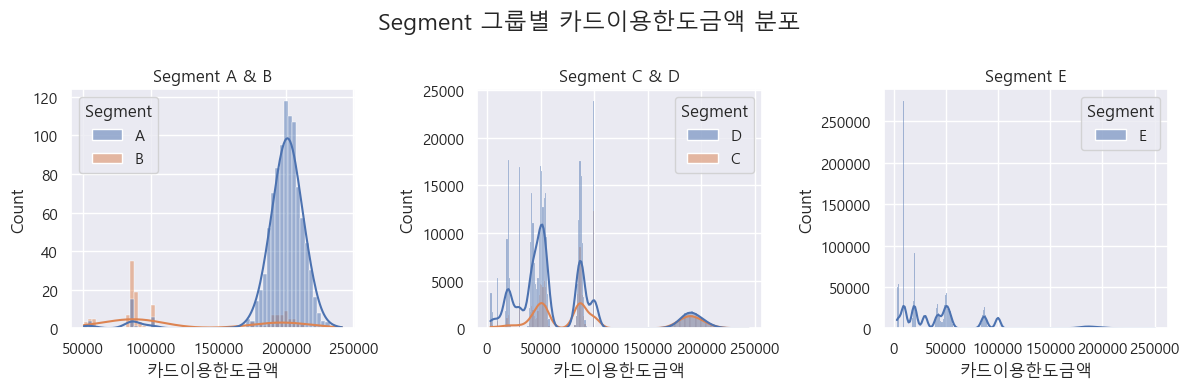

In [30]:
# 세그먼트별 데이터프레임 리스트와 레이블
dfs = [AB_df.loc[AB_df['카드이용한도금액'] != 0],
       CD_df.loc[CD_df['카드이용한도금액'] != 0],
       E_df.loc[E_df['카드이용한도금액'] != 0]]
segments = ['A & B', 'C & D', 'E']

# 서브플롯 생성 (2행 3열)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()  # 2차원을 1차원으로 변환해서 인덱싱 편하게

# 각 세그먼트별 subplot에 그래프 그리기
for i, (df_seg, seg_label) in enumerate(zip(dfs, segments)):
    sns.histplot(
        data=df_seg,
        x='카드이용한도금액',
        kde=True,
        hue='Segment',
        ax=axes[i]
    )
    axes[i].set_title(f'Segment {seg_label}')
    axes[i].set_xlabel('카드이용한도금액')
    axes[i].set_ylabel('Count')

# 빈 subplot 제거 (2행 3열이지만 데이터는 5개)
if len(dfs) < len(axes):
    for j in range(len(dfs), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle('Segment 그룹별 카드이용한도금액 분포')
plt.tight_layout()
plt.show()

In [29]:
# y축 범위 설정 추가 버전
for i, (df_seg, seg_label) in enumerate(zip(dfs, segments)):
    sns.histplot(
        data=df_seg,
        x='카드이용한도금액',
        hue='Segment',
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(f'Segment {seg_label}')
    axes[i].set_xlabel('카드이용한도금액')
    axes[i].set_ylabel('Count')

    # Segment E의 y축 단위 제한 (예: 최대 100000)
    if seg_label == 'E':
        axes[i].set_ylim(0, 100000)


- A는 대부분 높은 이용한도 금액에 분포되어 있는 것을 볼 수 있다.
- 다른 분포의 경우 여러 금액대에 분포가 생기지만 대체로 낮은 쪽에 분포되어 있다.

#### 일시상환론한도금액

In [15]:
df.loc[df['Segment'] == 'B', '일시상환론한도금액'].value_counts()

일시상환론한도금액
0         18
200000     2
48012      1
48000      1
199992     1
90001      1
Name: count, dtype: int64

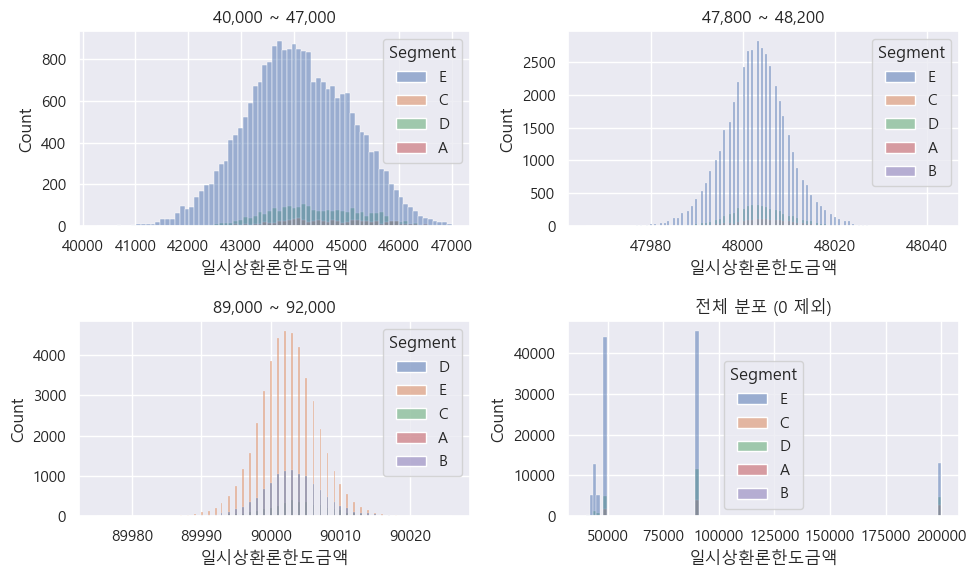

In [16]:
# 1. 데이터 구간별 필터링
a1 = df.loc[(df['일시상환론한도금액'] >= 40000) & (df['일시상환론한도금액'] <= 47000)]
a2 = df.loc[(df['일시상환론한도금액'] >= 47800) & (df['일시상환론한도금액'] <= 48200)]
a3 = df.loc[(df['일시상환론한도금액'] >= 89000) & (df['일시상환론한도금액'] <= 92000)]
a4 = df.loc[df['일시상환론한도금액'] != 0]

# 2. Subplot 구성
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  #

# 3. 각 구간에 대해 히스토그램 그리기
sns.histplot(data=a1, x='일시상환론한도금액', hue='Segment', ax=axes[0, 0])
axes[0, 0].set_title('40,000 ~ 47,000')

sns.histplot(data=a2, x='일시상환론한도금액', hue='Segment', ax=axes[0, 1])
axes[0, 1].set_title('47,800 ~ 48,200')

sns.histplot(data=a3, x='일시상환론한도금액', hue='Segment', ax=axes[1, 0])
axes[1, 0].set_title('89,000 ~ 92,000')

sns.histplot(data=a4, x='일시상환론한도금액', hue='Segment', ax=axes[1, 1])
axes[1, 1].set_title('전체 분포 (0 제외)')

# 4. 공통 설정
for ax in axes.flat:
    ax.set_xlabel('일시상환론한도금액')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [18]:
E_df = df.loc[df['Segment'] == 'E']
CD_df = df.loc[df['Segment'].isin(['C', 'D'])]
AB_df = df.loc[df['Segment'].isin(['A', 'B'])]

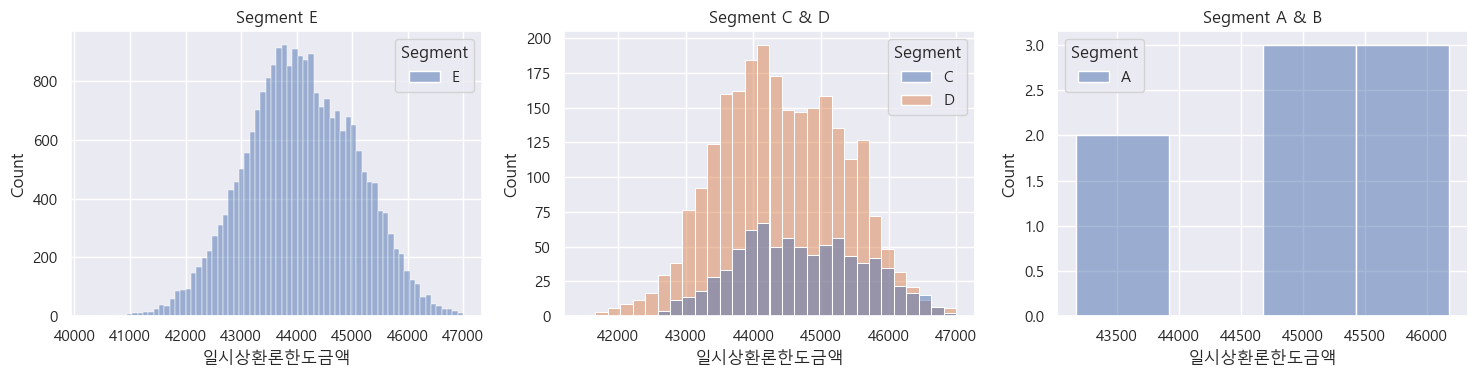

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
# sns.set(style='whitegrid')
# plt.rcParams['axes.axisbelow'] = True

# 데이터 필터링
e1 = E_df.loc[(E_df['일시상환론한도금액'] >= 40000) & (E_df['일시상환론한도금액'] <= 47000)]
cd1 = CD_df.loc[(CD_df['일시상환론한도금액'] >= 40000) & (CD_df['일시상환론한도금액'] <= 47000)]
ab1 = AB_df.loc[(AB_df['일시상환론한도금액'] >= 40000) & (AB_df['일시상환론한도금액'] <= 47000)]

# Subplot 구성
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

# 각각의 subplot에 histplot 그리기
sns.histplot(data=e1, x='일시상환론한도금액', hue='Segment', ax=axes[0])
axes[0].set_title('Segment E')

sns.histplot(data=cd1, x='일시상환론한도금액', hue='Segment', ax=axes[1])
axes[1].set_title('Segment C & D')

sns.histplot(data=ab1, x='일시상환론한도금액', hue='Segment', ax=axes[2])
axes[2].set_title('Segment A & B')

# 공통 설정
for ax in axes:
    ax.set_xlabel('일시상환론한도금액')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

- A & B의 경우 거의 없음 -> 낮은 한도에는 분포되지 않는다.

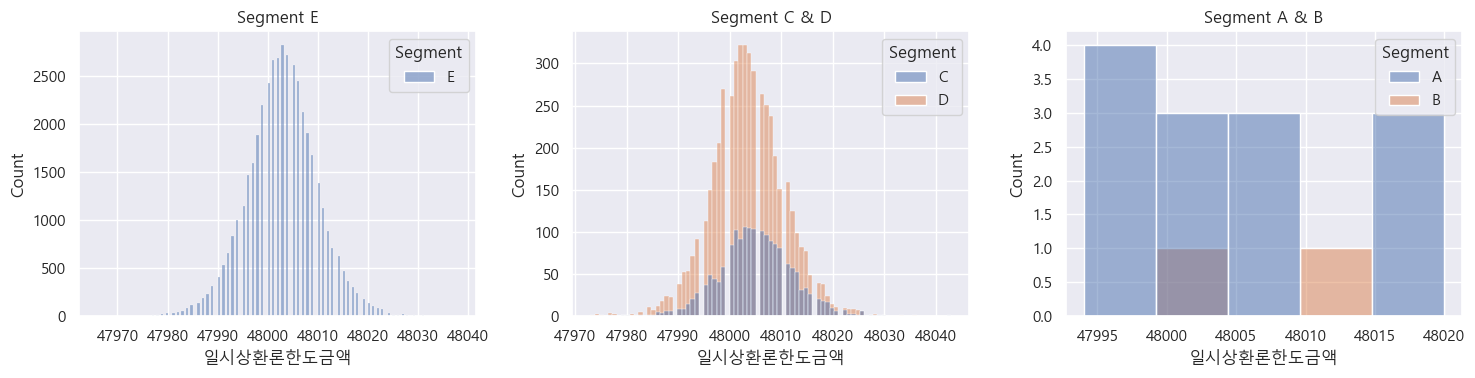

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
# sns.set(style='whitegrid')
# plt.rcParams['axes.axisbelow'] = True

# 데이터 필터링
e1 = E_df.loc[(E_df['일시상환론한도금액'] >= 47800) & (E_df['일시상환론한도금액'] <= 48200)]
cd1 = CD_df.loc[(CD_df['일시상환론한도금액'] >= 47800) & (CD_df['일시상환론한도금액'] <= 48200)]
ab1 = AB_df.loc[(AB_df['일시상환론한도금액'] >= 47800) & (AB_df['일시상환론한도금액'] <= 48200)]

# Subplot 구성
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

# 각각의 subplot에 histplot 그리기
sns.histplot(data=e1, x='일시상환론한도금액', hue='Segment', ax=axes[0])
axes[0].set_title('Segment E')

sns.histplot(data=cd1, x='일시상환론한도금액', hue='Segment', ax=axes[1])
axes[1].set_title('Segment C & D')

sns.histplot(data=ab1, x='일시상환론한도금액', hue='Segment', ax=axes[2])
axes[2].set_title('Segment A & B')

# 공통 설정
for ax in axes:
    ax.set_xlabel('일시상환론한도금액')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


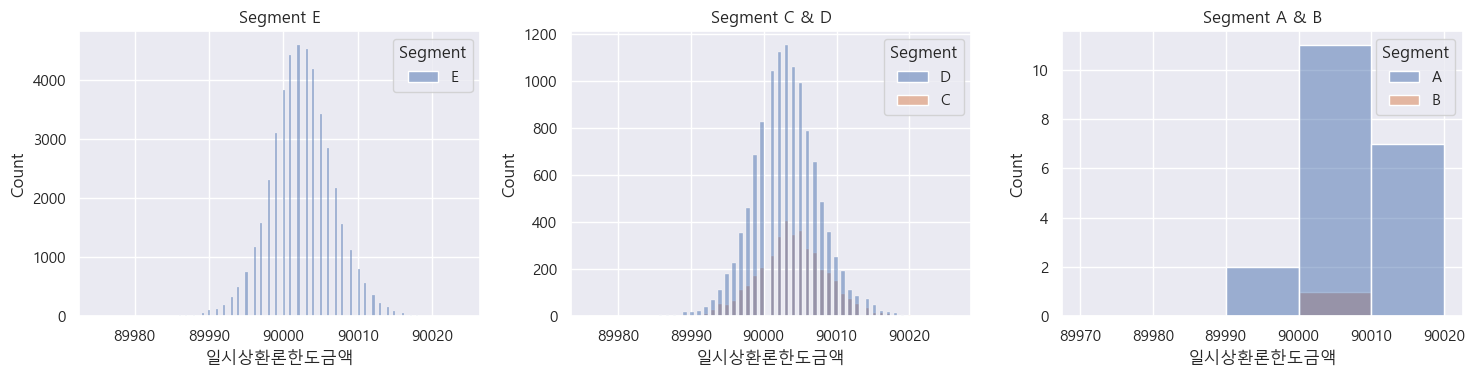

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
# sns.set(style='whitegrid')
# plt.rcParams['axes.axisbelow'] = True

# 데이터 필터링
e1 = E_df.loc[(E_df['일시상환론한도금액'] >= 89000) & (E_df['일시상환론한도금액'] <= 92000)]
cd1 = CD_df.loc[(CD_df['일시상환론한도금액'] >= 89000) & (CD_df['일시상환론한도금액'] <= 92000)]
ab1 = AB_df.loc[(AB_df['일시상환론한도금액'] >= 89000) & (AB_df['일시상환론한도금액'] <= 92000)]

# Subplot 구성
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

# 각각의 subplot에 histplot 그리기
sns.histplot(data=e1, x='일시상환론한도금액', hue='Segment', ax=axes[0])
axes[0].set_title('Segment E')

sns.histplot(data=cd1, x='일시상환론한도금액', hue='Segment', ax=axes[1])
axes[1].set_title('Segment C & D')

sns.histplot(data=ab1, x='일시상환론한도금액', hue='Segment', bins = [89970, 89980, 89990, 90000, 90010, 90020], ax=axes[2])
axes[2].set_title('Segment A & B')

# 공통 설정
for ax in axes:
    ax.set_xlabel('일시상환론한도금액')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

#### 카드이용한도금액_B1M

In [ ]:
df['카드이용한도금액_B1M']

In [ ]:
card_df.corr()

In [ ]:
# Segment
target = df['Segment']

# segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(target, prefix='segment')

card_df = pd.DataFrame({
    '카드이용한도금액' : df['카드이용한도금액'],
    '카드이용한도금액_B1M' : df['카드이용한도금액_B1M'],
    '카드이용한도금액_B2M' : df['카드이용한도금액_B2M']
})

corr_df = pd.concat([card_df, segment_dummies], axis = 1)

# 전체 상관계수 구하기 (피어슨 방식이 기본)
corr_matrix = corr_df.corr()

# segment_dummies 행 vs numeric_cols 열만 추출
segment_corr = corr_matrix.loc[segment_dummies.columns, card_df.columns]

# 히트맵 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(segment_corr.T, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5, vmin = -1, vmax = 1)
plt.title('Pearson Correlation: Segment vs 한도 정보 그룹', pad = 20)
plt.xlabel('한도 정보 그룹 Variables')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

- 카드이용한도금액

In [ ]:
# 세그먼트별 데이터프레임 리스트와 레이블
dfs = [A_df.loc[A_df['카드이용한도금액'] != 0],
       B_df.loc[B_df['카드이용한도금액'] != 0],
       C_df.loc[C_df['카드이용한도금액'] != 0],
       D_df.loc[D_df['카드이용한도금액'] != 0],
       E_df.loc[E_df['카드이용한도금액'] != 0]]
segments = ['A', 'B', 'C', 'D', 'E']

# 서브플롯 생성 (2행 3열)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # 2차원을 1차원으로 변환해서 인덱싱 편하게

# 각 세그먼트별 subplot에 그래프 그리기
for i, (df_seg, seg_label) in enumerate(zip(dfs, segments)):
    sns.histplot(
        data=df_seg,
        x='카드이용한도금액',
        kde=True,
        hue='Segment',
        ax=axes[i]
    )
    axes[i].set_title(f'Segment {seg_label}')
    axes[i].set_xlabel('카드이용한도금액')
    axes[i].set_ylabel('Count')

# 빈 subplot 제거 (2행 3열이지만 데이터는 5개)
if len(dfs) < len(axes):
    for j in range(len(dfs), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 카드이용한도금액_B2M

In [ ]:
df['카드이용한도금액_B2M']

In [ ]:
df['rv최초시작후경과일']

In [ ]:
for idx, val in enumerate(df.columns) :
    print(f'{idx} : {val}')

#### 한도증액금액_R12M

- 금액이 0, 1, 2, 3으로 나오기 때문에 데이터의 의미를 찾기 힘들다.

In [ ]:
df['한도증액금액_R12M'].value_counts()

In [ ]:
df['한도증액횟수_R12M'].value_counts()